# Guide to GIS data analysis
1. Understand the GIS data types
2. Installing libraries for GIS data analysis
3. Working with Vector data - Shapefiles, GeoJSON
4. EDA on vector data
5. WOrking with Raster data - GeoTIFF
6. Interactive GIS data Visualization with `folium`
7. Advanced Anallysis
8. Saving processed GIS Data

## 1. Understanding the GIS Data Types
### - Vector 
- represents points, lines, polygons - eg road, boundaries
- common formats:
    - shapefiles - 
    - GeoJSON

### Raster data - (GeoTIFF, NetCDF, etc)
- Represents griddedn data - satelite images, elevation models
- Common formats:
    - GeoTIFF - (.tif) - Stores the rater images with geospatial metadata
    - NetCDF - (.nc) - Used for climate and environmental data

## 2. Installing the required libraries

- geopandas
- folium
- fiona
- rasterio
- matplotlib
- descates
- rasterstats
- shapely
- contextily

## Working with Vector Data
### Loading a shapefile data

In [3]:
import geopandas as gpd # importing the geopandas library

In [5]:
# Load the data
shapefile_path = r"C:\Users\Admin\Desktop\Omdena\Tanzania_CBWP_KIC\Week 7\data\ServiceDistricts.shp"
gdf = gpd.read_file(shapefile_path)

In [6]:
# Display the forst few rows of our data
gdf.head()

,geometry
0,"POLYGON ((1766078.549 711757.27, 1766000.028 7..."
1,"MULTIPOLYGON (((1800630.485 619627.187, 180060..."


In [7]:
# Check the data type
gdf.dtypes

geometry    geometry
dtype: object

###  Plotting the shapefile data

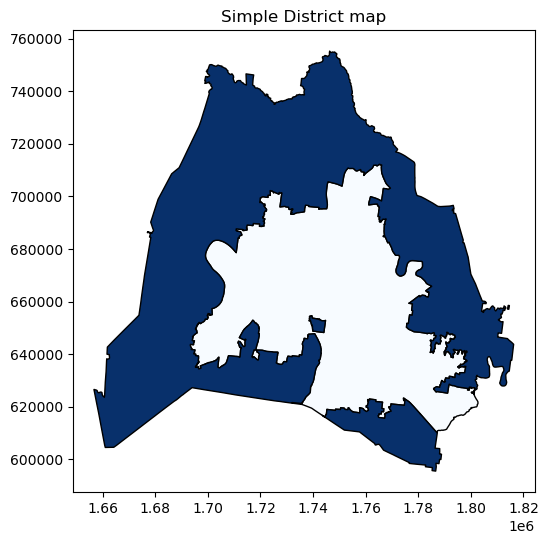

In [8]:
import matplotlib.pyplot as plt

# Plot the shapefile
gdf.plot(figsize = (10, 6), edgecolor = 'black', cmap = 'Blues')
plt.title("Simple District map")
plt.show()

## Loading GeoJSON Data/file

In [9]:
path = r"C:\Users\Admin\Desktop\Omdena\Tanzania_CBWP_KIC\Week 7\data\school-district.geojson"
gdf_geojson = gpd.read_file(path)

In [10]:
# Display the head
gdf_geojson.head()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
0,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,"MULTIPOLYGON (((-86.77136 36.38357, -86.77134 ..."
1,Jill,Madison,37115,jill.speering@mnps.org,TN,Speering,1033 Falls Avenue,Vice-Chair,2016,3,615-562-5234,"MULTIPOLYGON (((-86.75365 36.40428, -86.75353 ..."
2,Dr. Jo Ann,Nashville,37220,joann.brannon@mnps.org,TN,Brannon,5444 San Marcos Drive,Member,2018,2,615-833-5976,"MULTIPOLYGON (((-86.76696 36.08333, -86.7659 3..."
3,Anna,Hermitage,37076,anna.shepherd@mnps.org,TN,Shepherd,4545 Raccoon Trail,Chair,2018,4,615-210-3768,"MULTIPOLYGON (((-86.58098 36.20935, -86.58099 ..."
4,Amy,Nashville,37221,amy.frogge@mnps.org,TN,Frogge,7237 Riverfront Drive,Member,2016,9,615-521-5650,"MULTIPOLYGON (((-86.97287 36.20828, -86.97045 ..."


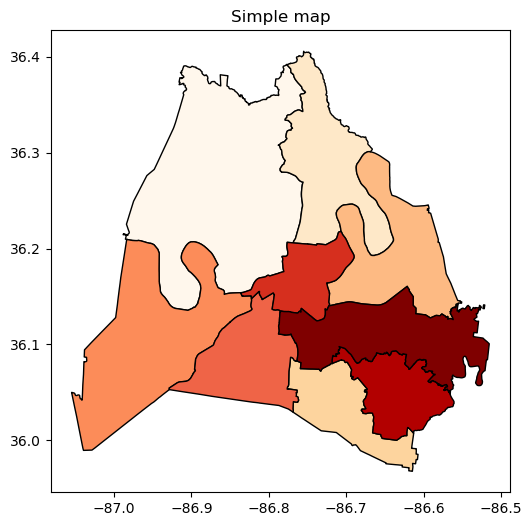

In [11]:
# Plotting the geojson
gdf_geojson.plot(figsize = (10, 6), edgecolor = 'black', cmap = 'OrRd')
plt.title("Simple map")
plt.show()

In [12]:
## Inspecting the coordinate Reference system (CRS)
print(gdf.to_crs)

<bound method GeoDataFrame.to_crs of                                             geometry
0  POLYGON ((1766078.549 711757.27, 1766000.028 7...
1  MULTIPOLYGON (((1800630.485 619627.187, 180060...>


In [13]:
print(gdf_geojson.to_crs)

<bound method GeoDataFrame.to_crs of    first_name       city    zip                           email state  \
0  Dr. Sharon  Nashville  37218  gentryfordistrict1@comcast.net    TN   
1        Jill    Madison  37115          jill.speering@mnps.org    TN   
2  Dr. Jo Ann  Nashville  37220          joann.brannon@mnps.org    TN   
3        Anna  Hermitage  37076          anna.shepherd@mnps.org    TN   
4         Amy  Nashville  37221             amy.frogge@mnps.org    TN   
5        Mary  Nashville  37215       mary@pierceforschools.org    TN   
6   Christine  Nashville  37203                 cbuggs@mnps.org    TN   
7       Tyese    Antioch  37013           tyese.hunter@mnps.org    TN   
8        Will  Nashville  37204     will@pinkstonforschools.com    TN   

  last_name                address    position term_expir district  \
0    Gentry        6108 Beals Lane      Member       2016        1   
1  Speering      1033 Falls Avenue  Vice-Chair       2016        3   
2   Brannon  5444 San 

In [14]:
# Reprojecting to a different CRS
gdf = gdf.to_crs(epsg=4326) # COnvert to wgs 84
print(gdf.crs)

ValueError: Cannot transform naive geometries.  Please set a crs on the object first.

# EDA in GIS


In [15]:
# Summary Statistics
gdf_geojson.describe()

,first_name,city,zip,email,state,last_name,address,position,term_expir,district,phone,geometry
count,9,9,9,9,9,9,9,9,9,9,9,9
unique,9,4,9,9,1,9,9,3,2,9,9,9
top,Dr. Sharon,Nashville,37218,gentryfordistrict1@comcast.net,TN,Gentry,6108 Beals Lane,Member,2016,1,615-268-5269,MULTIPOLYGON (((-86.77136400034288 36.38356699...
freq,1,6,1,1,9,1,1,7,5,1,1,1


In [16]:
# Check for the missing values
gdf_geojson.isnull().sum()

first_name    0
city          0
zip           0
email         0
state         0
last_name     0
address       0
position      0
term_expir    0
district      0
phone         0
geometry      0
dtype: int64

## WOrking with Raster data (GeoTIFF)
- Loading the raster data

In [17]:
import rasterio
from rasterio.plot import show

Raster Shape: (1001, 1001)


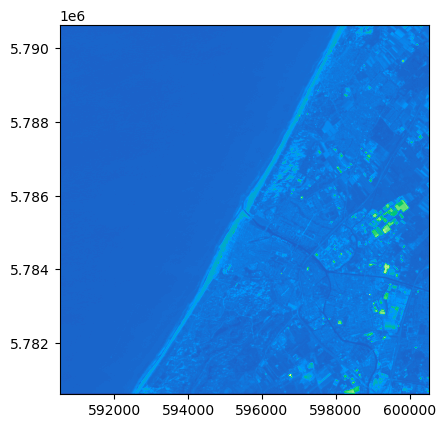

In [20]:
# Load the raster file
path = r"C:\Users\Admin\Desktop\Omdena\Tanzania_CBWP_KIC\Week 7\data\sample.tif"

with rasterio.open(path) as src:
    raster_data = src.read(1) # Read first band
    print("Raster Shape:", raster_data.shape)
    show(src, cmap = 'terrain') # plot the raster

In [21]:
# Extract raster metadata
print(src.meta)

{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 1001, 'height': 1001, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'), 'transform': Affine(10.0, 0.0, 590520.0,
       0.0, -10.0, 5790630.0)}


## Interactive GIS Data visualization with folium

In [22]:
# Import folium
import folium

In [26]:
# innitiaalize a map centered at Nairbi
m = folium.Map(location = [-3.386925, 36.682995], zoom_start=10)

# add the shapefile as a GeoJSON layer
# folium.GeoJson(gdf).add_to(m)

# display the map
m

# Advanced Analysis